## MADS 643 Week2 Assignment

In [11]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from data_loads import load_txt
from fruit_name_lookup import fruit_name_lookup

## Data loading

In [12]:
def data_loads(file_path):
    # Load the data
    fruits = load_txt(file_path)
    return fruits

## Data Cleaning

In [13]:
def clean_data(fruits):
    # Load the data
    fruits = data_loads(file_path)
    # Remove the fruit subtype column
    fruits_cleaned = fruits.drop('fruit_subtype', axis=1)
    return fruits_cleaned

file_path = 'fruit_data_with_colors.txt'
fruits = data_loads(file_path)
fruits_cleaned = clean_data(fruits)
fruits_cleaned.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


## Analysis

### Modeling Data

In [14]:
def pipeline():
    '''
    This function returns a pipeline object that can be used to fit and predict on the data
    '''
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.compose import ColumnTransformer
    numeric_features = ['mass', 'width', 'height', 'color_score']
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])
    return pipeline

In [15]:

def train(fruits_cleaned):
    '''
    This function trains a model on
    the cleaned data and returns the trained model
    '''
    # Define the feature matrix and target vector
    feature_names_fruits = ['mass', 'width', 'height', 'color_score']
    X_fruits = fruits_cleaned[feature_names_fruits]
    y_fruits = fruits_cleaned['fruit_label']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_fruits,
        y_fruits,
        random_state=0
        )
    trained_model = pipeline()
    trained_model.fit(X_train, y_train)
     # Store model metrics in a dictionary
    model_metrics = {
        "train_data": {
            "Accuracy of K-NN classifier": round(trained_model.score(X_train, y_train),3)
        },
        "test_data": {
            "Accuracy of K-NN classifier": round(trained_model.score(X_test, y_test),3)
        },
    }
    print(model_metrics)

    return trained_model

In [16]:
trained_model = train(fruits_cleaned)
trained_model

{'train_data': {'Accuracy of K-NN classifier': 0.955}, 'test_data': {'Accuracy of K-NN classifier': 1.0}}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mass', 'width', 'height',
                                                   'color_score'])])),
                ('classifier', KNeighborsClassifier())])

### Predict

In [17]:
def predict(h, w, m, color_score, fruits_cleaned, trained_model):
    '''
    This function takes in the height, width, mass,
    and color score of a fruit and returns the predicted fruit type
    '''
    # Create a dataframe from the input data
    input_data = pd.DataFrame(
        {'height': [h], 'width': [w],
        'mass': [m], 'color_score': [color_score]}
        )
    # Make a prediction
    prediction = trained_model.predict(input_data)
    # create fruit and name lookup dictionary
    lookup_fruit_name = fruit_name_lookup(fruits_cleaned)
    # Return the predicted fruit type
    return print('Predicted fruit type for ',
                 input_data, ' is ',
                 lookup_fruit_name[prediction[0]]
                 )

In [18]:
predict(5.5, 2.2, 10.0, 0.7,
         fruits_cleaned, trained_model
         )

Predicted fruit type for     height  width  mass  color_score
0     5.5    2.2  10.0          0.7  is  mandarin


# Visualization

In [19]:
from plot_knn import plot_fruit_knn
def visualize_knn(fruits_cleaned, output_fig):
    '''
    This function visualizes the KNN classifier
    '''
    # Define the feature matrix and target vector
    feature_names_fruits = ['mass', 'width', 'height', 'color_score']
    X_fruits = fruits_cleaned[feature_names_fruits]
    y_fruits = fruits_cleaned['fruit_label']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_fruits,
        y_fruits,
        random_state=0
        )
    # Visualize the KNN classifier
    plot_fruit_knn(X_train, y_train, 5, 'uniform')
    plt.savefig(output_fig)

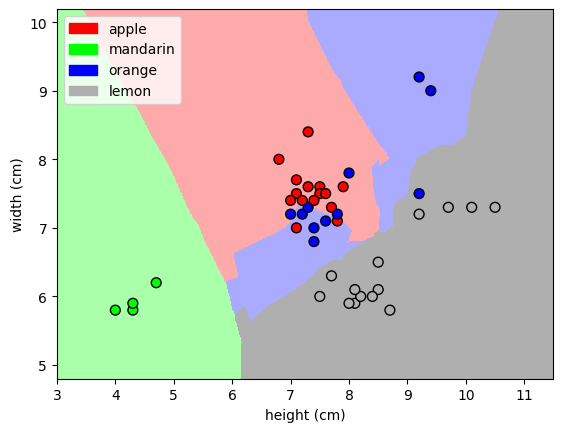

In [20]:
visualize_knn(fruits_cleaned, 'knn_visualization.png')